# Modelling api response times with 
# 1. requests 
# 2. response time 

In [34]:
visitors = 100


In [26]:
from matplotlib import pyplot as plt

%matplotlib inline



# Requests are coming within $\lambda$ milliseconds from each other (this is how much we would sleep between requests)


# $\lambda$ = Poisson($\mu$)+1


In [74]:
from scipy.stats import poisson

mu = 10

def gen_distances(mu, N=visitors):
    return [1. + x for x in poisson.rvs(mu=mu, size=N)]

distances_between_requests = gen_distances(mu)
distances_between_requests[:10]

[12.0, 6.0, 9.0, 10.0, 11.0, 13.0, 17.0, 12.0, 6.0, 14.0]

''

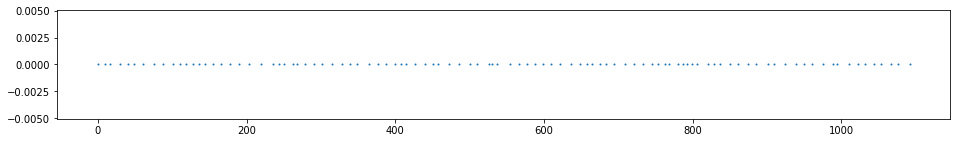

In [63]:
plt.figure(figsize=(16,2))
plt.scatter([sum(distances_between_requests[:n]) for n in range(visitors)], [0. for _ in range(visitors)], s=1)
;

In [67]:
for _ in range(10):
    print(sum(gen_distances(mu)))

1149.0
1106.0
1080.0
1041.0
1113.0
1097.0
1093.0
1105.0
1095.0
1065.0


# 1000ms = visitors (100) * mu (10)
# If we want to have control on RPS, let's ask to configure $\mu$ 
# RPS ~~ $\mu$*100
# $\mu$ = RPS / 100

# API response time is $\theta$ ms
(interesting reading: https://blog.newrelic.com/engineering/expected-distributions-website-response-times/)
# $\theta$ = $\Gamma$($\alpha$) with $\alpha>0$ of gamma distribution


In [73]:
from scipy.stats import gamma

alpha = 100

def gen_response_times(alpha, N=visitors):
    return gamma.rvs(a=alpha, size=N)

response_times = gen_response_times(alpha)
response_times[:10]

array([116.44596048, 105.63605112, 102.53586782,  88.63702858,
        97.70758084, 118.31155209,  87.3089286 ,  94.3556763 ,
        97.43897456,  99.99567042])

''

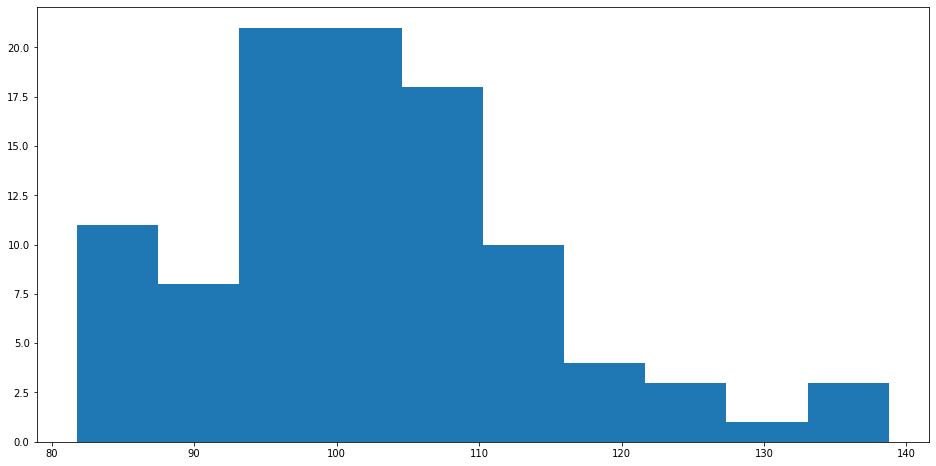

In [70]:
plt.figure(figsize=(16,8))
plt.hist(response_times)
;

# Group it alltogether

''

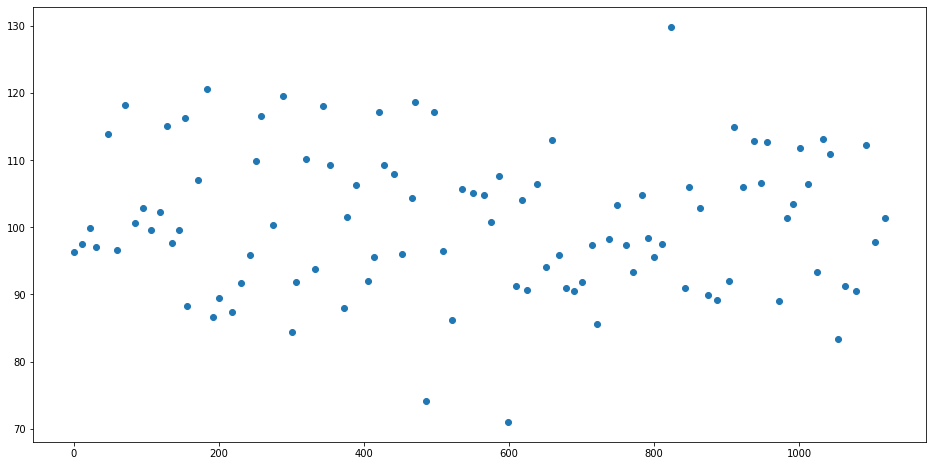

In [76]:
response_times = gen_response_times(alpha)
distances_between_requests = gen_distances(mu)

Xs = [sum(distances_between_requests[:n]) for n in range(visitors)]

plt.figure(figsize=(16,8))

plt.scatter(Xs, response_times)
;